<a href="https://colab.research.google.com/github/bstrain71/nu-software-survey/blob/master/Strain_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added
# Update 2019-09-18 by Brandon Strain for MSDS 422 DL Assignment 1

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

import warnings; warnings.simplefilter('ignore') # supress depreciation warnings

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv(
    '/content/drive/My Drive/MSDS_422/mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
# print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
# print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
#print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
#print(pd.DataFrame.head(valid_survey_input)) 

In [0]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

In [0]:
pd.DataFrame.describe(survey_df)

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


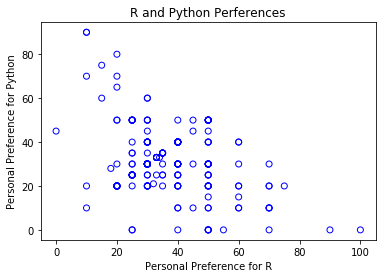

In [7]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
                     
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]

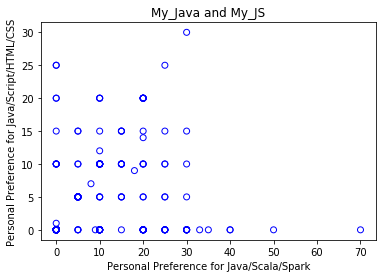

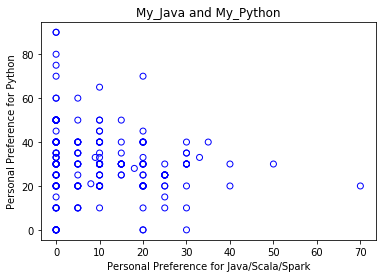

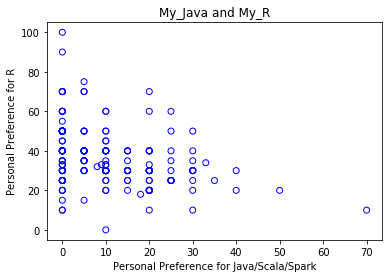

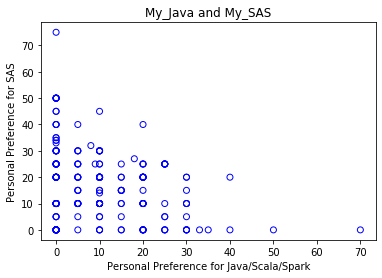

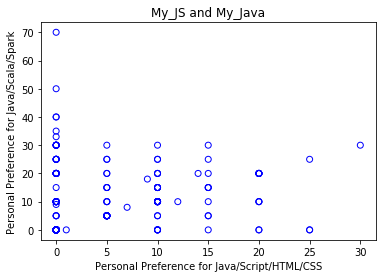

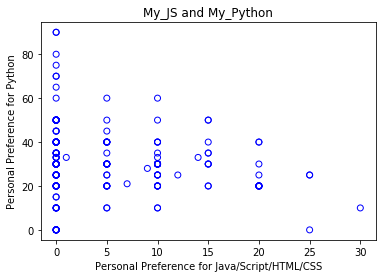

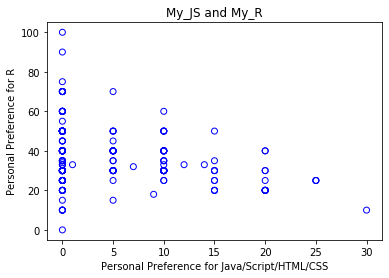

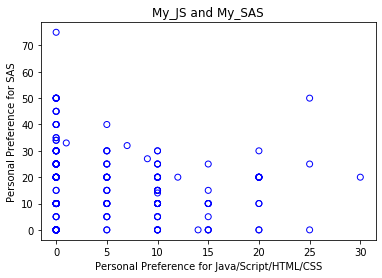

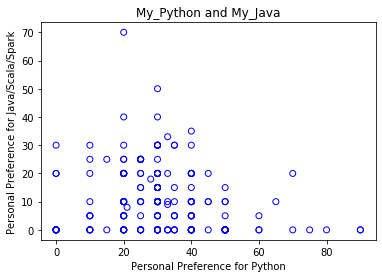

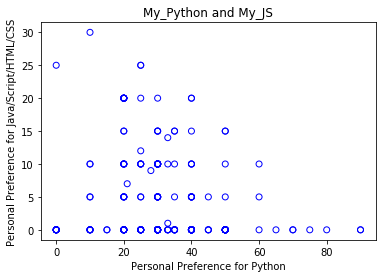

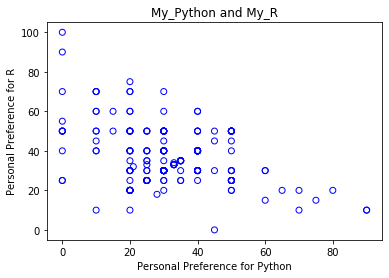

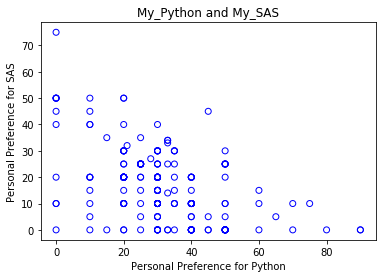

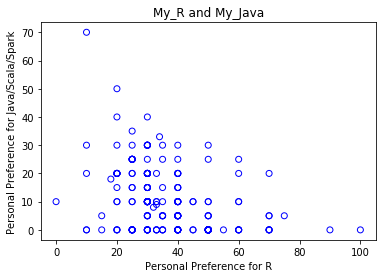

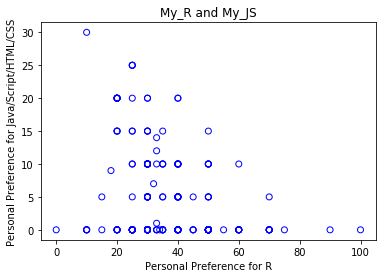

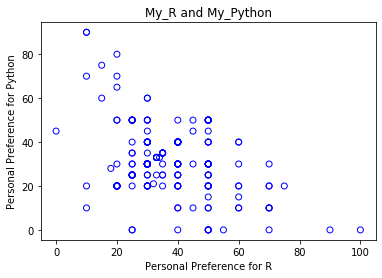

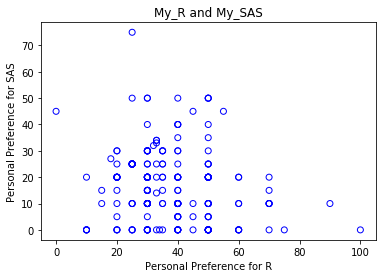

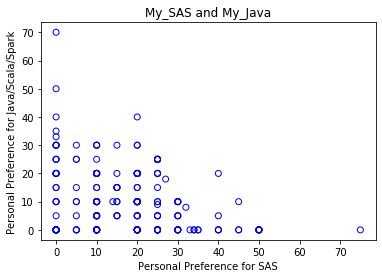

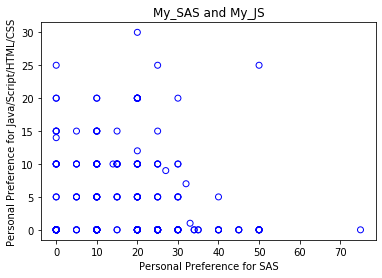

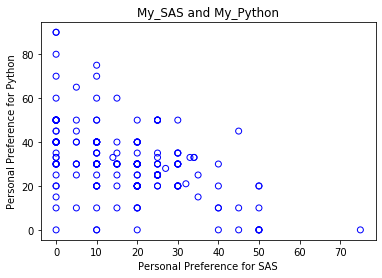

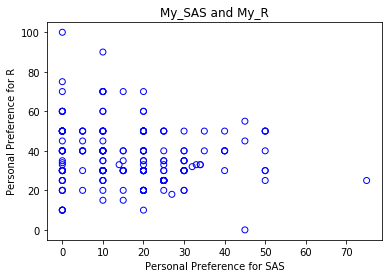

In [0]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)
            
            


In [0]:
print(survey_df.columns)

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date'],
      dtype='object')


In [0]:
survey_df[survey_df.columns[0:14]]

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R
RespondentID,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15
5132253300,20,0,40,40,0,0,0,40,40,20,30,0,30,40
5132096630,10,10,25,35,20,10,10,25,35,20,10,10,25,35
5131990362,20,0,0,70,10,20,0,0,80,0,40,0,0,60
5131860849,25,15,30,30,0,10,30,30,30,0,15,15,30,40
5131698528,20,0,40,30,10,70,0,25,5,0,40,10,30,20
5130809490,0,0,40,40,20,20,20,40,0,20,0,10,30,40
5130188921,30,15,20,20,15,30,20,30,15,5,25,20,35,10


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

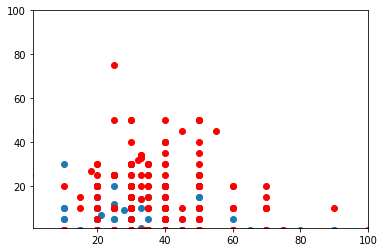

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(1, 100)
ax.set_ylim(1, 100)
ax.scatter(survey_df[survey_df.columns[2]],
          survey_df[survey_df.columns[1]])
ax.scatter(survey_df[survey_df.columns[3]],
          survey_df[survey_df.columns[4]],
          color = 'red')
ax.colorbar(survey_df[survey_df.columns[2]])

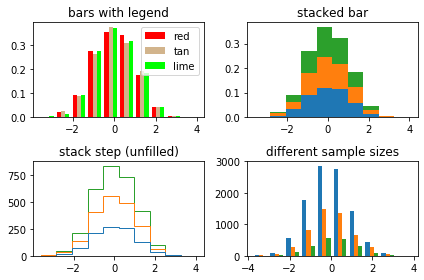

[[ 1.049  0.866  0.551]
 [ 1.728 -0.649 -0.478]
 [ 1.078  0.969 -0.809]
 ...
 [-0.797 -2.085 -0.348]
 [ 0.071  0.4   -0.915]
 [-1.039 -0.56  -0.951]]


(1000, 3)

In [0]:

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

print(x)
x.shape

In [0]:
x = survey_df[survey_df.columns[0:15]]
x.shape

(207, 15)

ValueError: color kwarg must have one color per data set. 207 data sets and 15 colors were provided

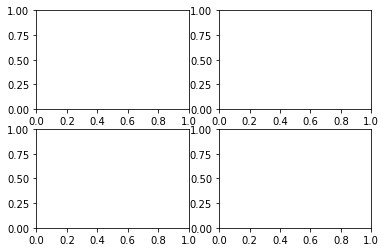

In [0]:
np.random.seed(19680801)

n_bins = 15
x = survey_df[survey_df.columns[0:15]]

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime', 'purple', 'indigo',
          'yellow', 'pink', 'silver', 'brown', 'black',
         'beige','navy','gray','darkgreen','green']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [0]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  